In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [8]:
np.random.seed(42)
test_period = [['2023-01-01', '2024-06-01']]

In [9]:
data = pd.read_csv('./merged_df.csv')
data['year-month'] = data['year-month'].apply(lambda x: str(datetime.strptime(x, '%Y-%m'))[:10])
data.set_index(keys=['year-month'], inplace=True)
sub_data = data[data['Monthly EV Sales with Noise'] > 0].copy()
sub_data.head(5)

,gas_value,Monthly EV Sales with Noise,Close,stations_number,Number of Licensed Drivers,electricity_price
year-month,,,,,,
2021-01-01,2.42025,845.419355,54.295263,85615.0,2.327820e+08,0.136
2021-02-01,2.58700,982.357143,57.543684,86786.0,2.328538e+08,0.137
2021-03-01,2.89760,1396.096774,55.610435,88122.0,2.329257e+08,0.138
2021-04-01,2.94775,1178.300000,57.717619,89724.0,2.329975e+08,0.139
2021-05-01,3.07620,1000.290323,48.893000,91551.0,2.330693e+08,0.140


In [10]:
train_index = [index for index in sub_data.index if index < test_period[0][0]]
test_index = [index for index in sub_data.index if index >= test_period[0][0]]
train_data = sub_data.loc[train_index]
test_data = sub_data.loc[test_index]

In [12]:
train_data.head()

,gas_value,Monthly EV Sales with Noise,Close,stations_number,Number of Licensed Drivers,electricity_price
year-month,,,,,,
2021-01-01,2.42025,845.419355,54.295263,85615.0,2.327820e+08,0.136
2021-02-01,2.58700,982.357143,57.543684,86786.0,2.328538e+08,0.137
2021-03-01,2.89760,1396.096774,55.610435,88122.0,2.329257e+08,0.138
2021-04-01,2.94775,1178.300000,57.717619,89724.0,2.329975e+08,0.139
2021-05-01,3.07620,1000.290323,48.893000,91551.0,2.330693e+08,0.140


In [13]:
# Pearson’s correlation coefficient, which measures linear correlation between pairs of variables.
corr_matrix = train_data.corr()
corr_matrix

,gas_value,Monthly EV Sales with Noise,Close,stations_number,Number of Licensed Drivers,electricity_price
gas_value,1.000000,0.737061,-0.875506,0.683822,0.642585,0.710895
Monthly EV Sales with Noise,0.737061,1.000000,-0.870798,0.928114,0.917996,0.899079
Close,-0.875506,-0.870798,1.000000,-0.910337,-0.877009,-0.892273
stations_number,0.683822,0.928114,-0.910337,1.000000,0.988148,0.951988
Number of Licensed Drivers,0.642585,0.917996,-0.877009,0.988148,1.000000,0.968794
electricity_price,0.710895,0.899079,-0.892273,0.951988,0.968794,1.000000


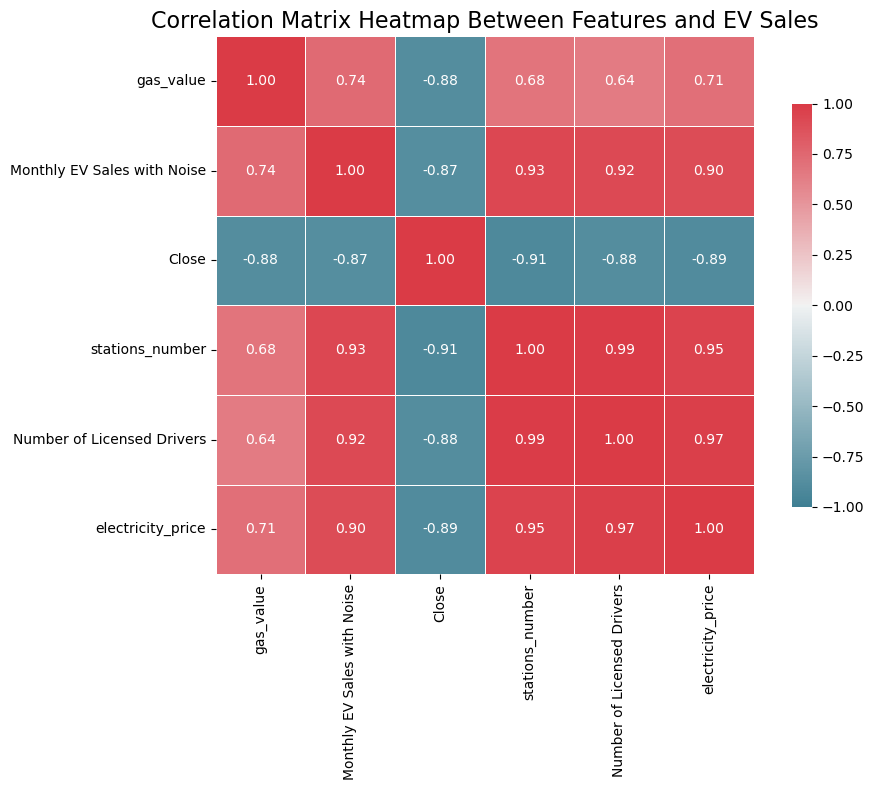

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define the colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    linewidths=.5,
    square=True,
    cbar_kws={"shrink": .75}
)

# Set the title
plt.title('Correlation Matrix Heatmap Between Features and EV Sales', fontsize=16)

# Display the plot
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()